In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('C:\\Users\\user\\Desktop\\데이터 분석\\datasets\\시도별 전출입 인구수.xlsx', header=0)

In [2]:
df.head(3)

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937


In [9]:
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울 -> 경상북도, 강원도, 충청남도, 전라남도 로 이동한 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_2 = df_seoul.loc[['경상북도', '강원도', '충청남도', '전라남도'], col_years]
df_2 = df_2.transpose()

df_2.head()

전입지,경상북도,강원도,충청남도,전라남도
1970,11868,9352,15954,10513
1971,16459,12885,18943,16755
1972,22073,13561,23406,20157
1973,27531,16481,27139,22160
1974,26902,15479,25509,21314


# 시각화_면적 그래프

In [10]:
# 한글 폰트 출력
plt.rc('font', family='Malgun Gothic')

import warnings
warnings.filterwarnings('ignore')

### stacked=False

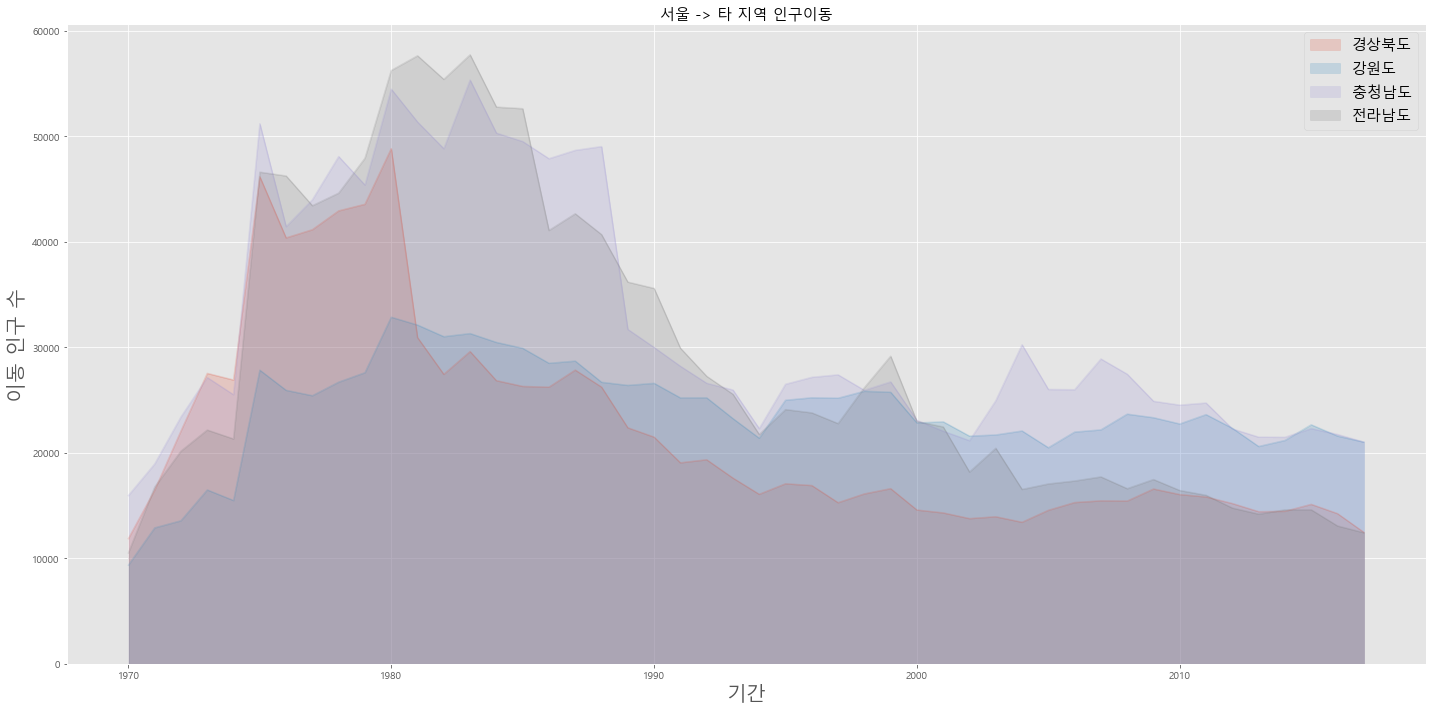

In [11]:
# stacked=False
plt.style.use('ggplot')

df_2.index = df_2.index.map(int)

df_2.plot(kind='area', stacked=False, alpha=0.2, figsize=(20, 10))

plt.title('서울 -> 타 지역 인구이동', size=15)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize=15)
plt.tight_layout()

plt.show()

### stacked=True

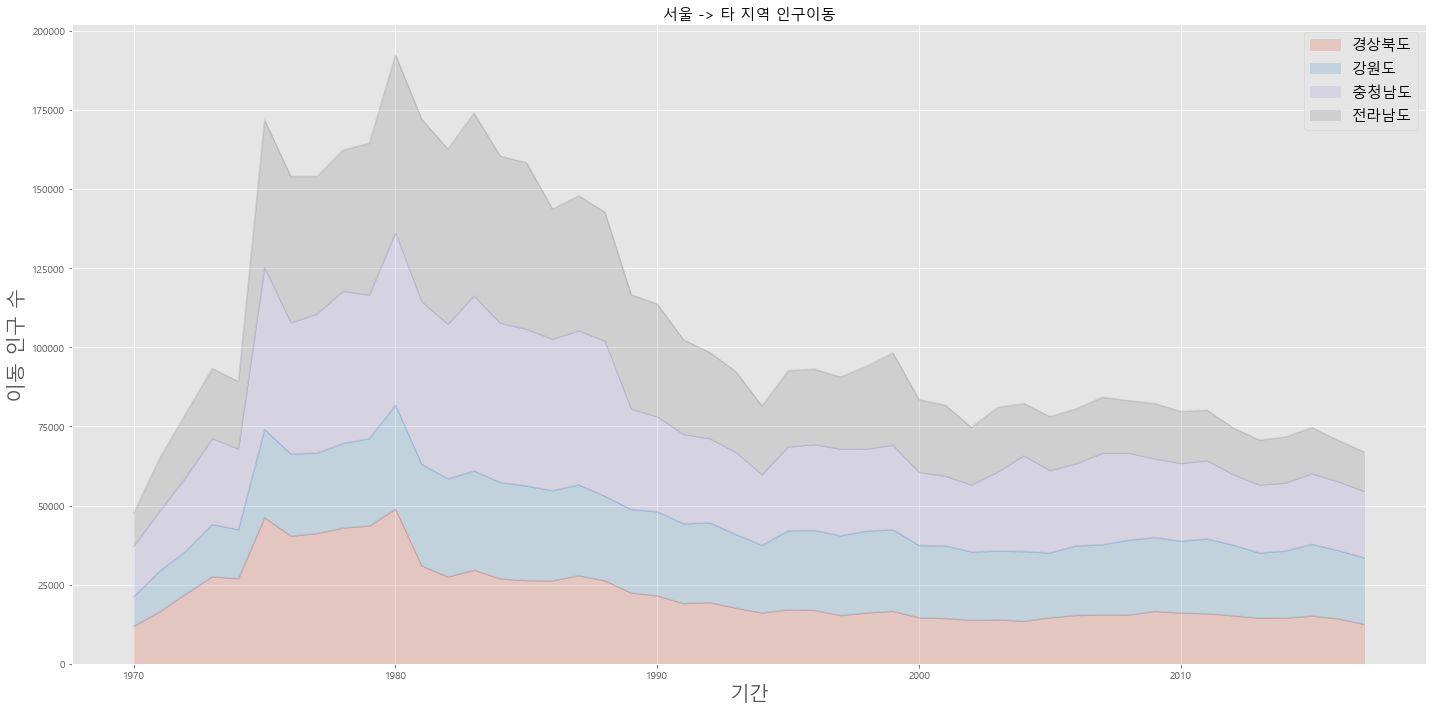

In [12]:
# stacked=True
plt.style.use('ggplot')

df_2.index = df_2.index.map(int)

df_2.plot(kind='area', stacked=True, alpha=0.2, figsize=(20, 10))

plt.title('서울 -> 타 지역 인구이동', size=15)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize=15)
plt.tight_layout()

plt.show()

### ax 객체로 세부적인 요소 설정

plot() 메소드로 생성한 그래프는 ax 객체<br/>
ax 객체 속성을 이용해 제목, 축, 이름 설정 가능

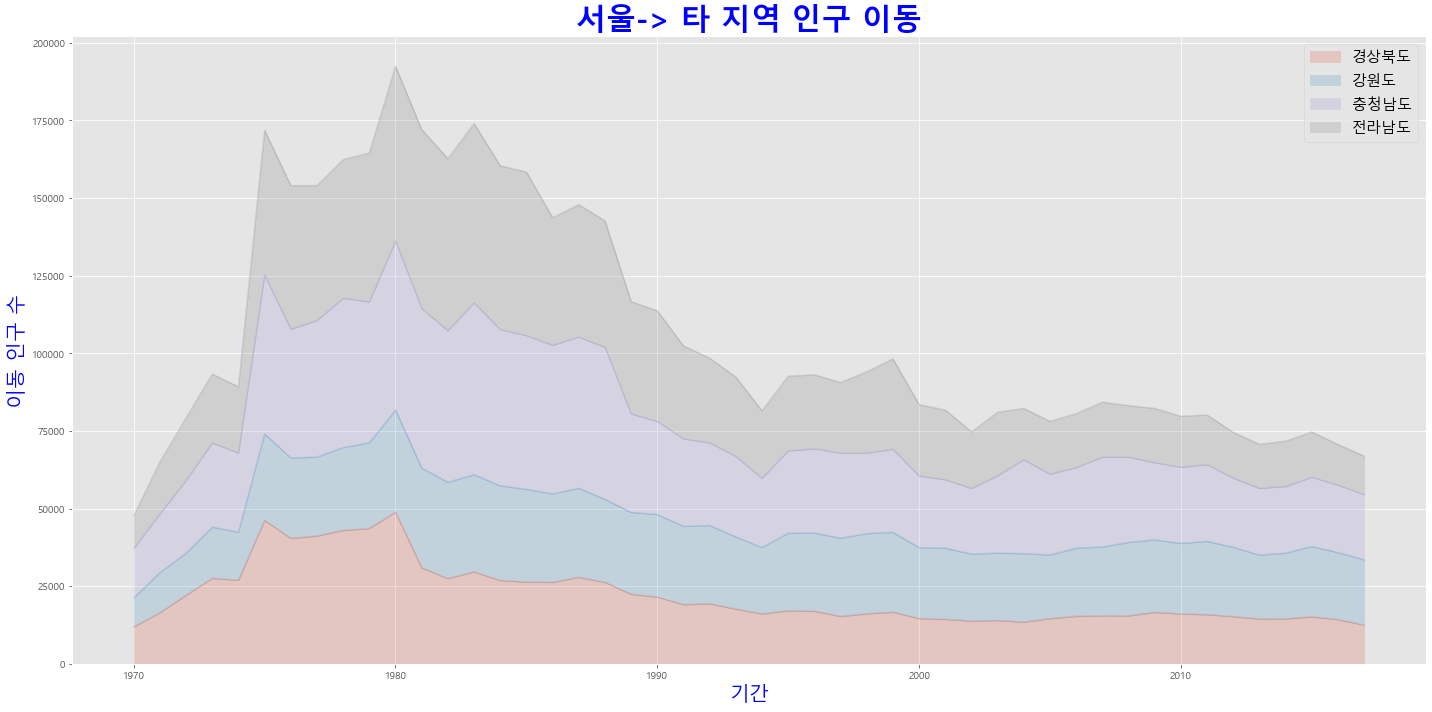

In [14]:
ax = df_2.plot(kind='area', stacked=True, alpha=0.2, figsize=(20, 10))

ax.set_title('서울-> 타 지역 인구 이동', size=30, color='blue', weight='bold')
ax.set_ylabel('이동 인구 수', size=20, color='blue')
ax.set_xlabel('기간', size=20, color='blue')
ax.legend(loc='best', fontsize=15)

plt.tight_layout()
plt.show()

# 시각화 막대 그래프

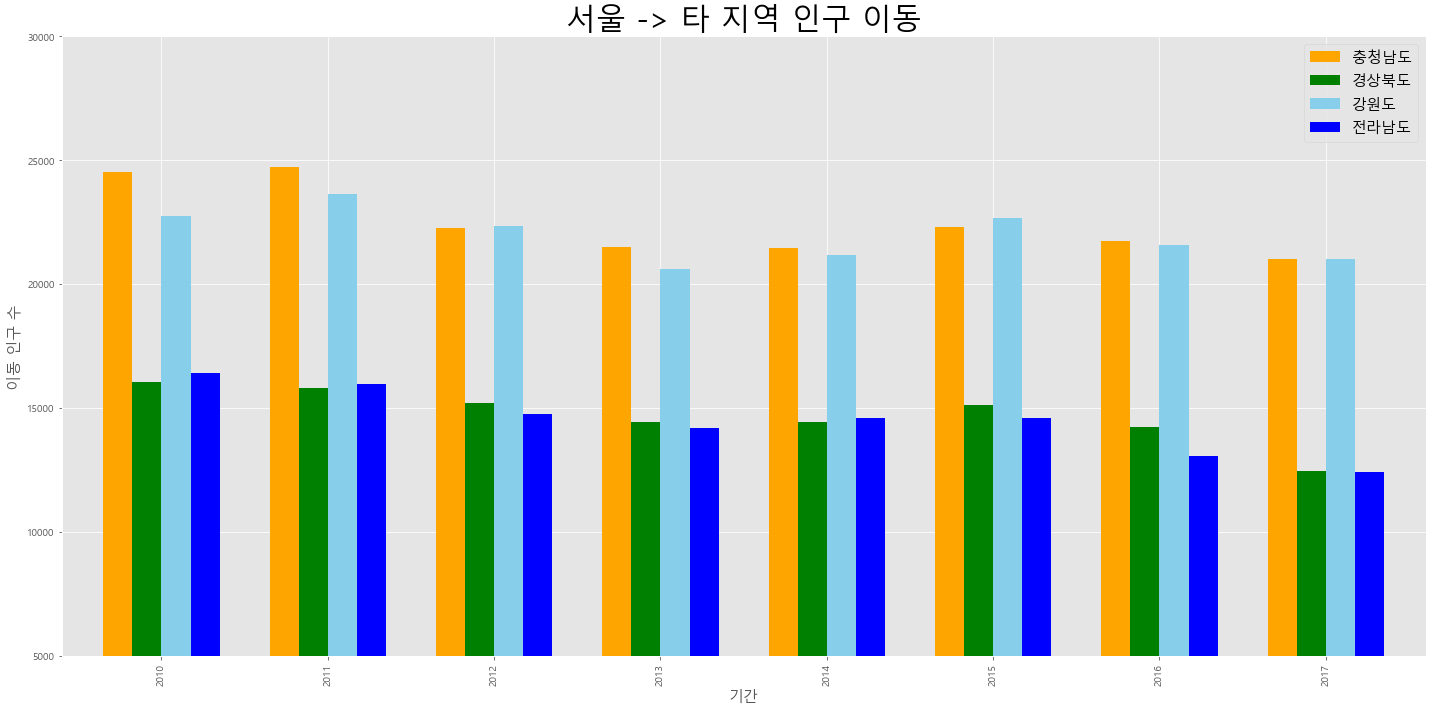

In [16]:
col_years = list(map(str, range(2010, 2018)))
df_3 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]
df_3 = df_3.transpose()
df_3.index = df_3.index.map(int)

df_3.plot(kind='bar', figsize=(20, 10), width=0.7,
         color=['orange', 'green','skyblue', 'blue'])

plt.title('서울 -> 타 지역 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=15)
plt.xlabel('기간', size=15)
plt.ylim(5000, 30000)
plt.legend(loc='best', fontsize=15)

plt.tight_layout()
plt.show()

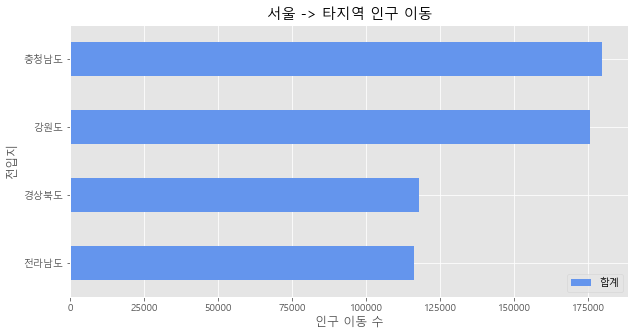

In [21]:
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]

df_4['합계'] = df_4.sum(axis=1)

# 가장 큰 값부터 정렬
df_total = df_4[['합계']].sort_values(by='합계', ascending=True)
df_total.plot(kind='barh',color='cornflowerblue', width=0.5, figsize=(10,5))

plt.title('서울 -> 타지역 인구 이동')
plt.ylabel('전입지')
plt.xlabel('인구 이동 수')

plt.show()

### 2축 그래프

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family="Malgun Gothic")

df = pd.read_excel('C:\\Users\\user\\Desktop\\데이터 분석\\datasets\\남북한발전전력량.xlsx', header=0)
df.head()

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,NaN,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,NaN,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,NaN,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,NaN,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195


In [24]:
plt.style.use('ggplot')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정

df = df.loc[5:9]
df.drop('전력량 (억㎾h)', axis='columns', inplace=True)
df.set_index('발전 전력별', inplace=True)
df = df.T

df.head()

발전 전력별,합계,수력,화력,원자력
1990,277,156,121,-
1991,263,150,113,-
1992,247,142,105,-
1993,221,133,88,-
1994,231,138,93,-


In [27]:
# 증감률 계산
df = df.rename(columns={'합계':'총발전량'})
df['총 발전량 - 1년'] = df['총발전량'].shift(1)
df['증감률'] = ((df['총발전량']/df['총 발전량 - 1년']) - 1) * 100

df.head()

발전 전력별,총발전량,수력,화력,원자력,총 발전량 - 1년,증감률
1990,277,156,121,-,NaN,NaN
1991,263,150,113,-,277,-5.054152
1992,247,142,105,-,263,-6.08365
1993,221,133,88,-,247,-10.526316
1994,231,138,93,-,221,4.524887


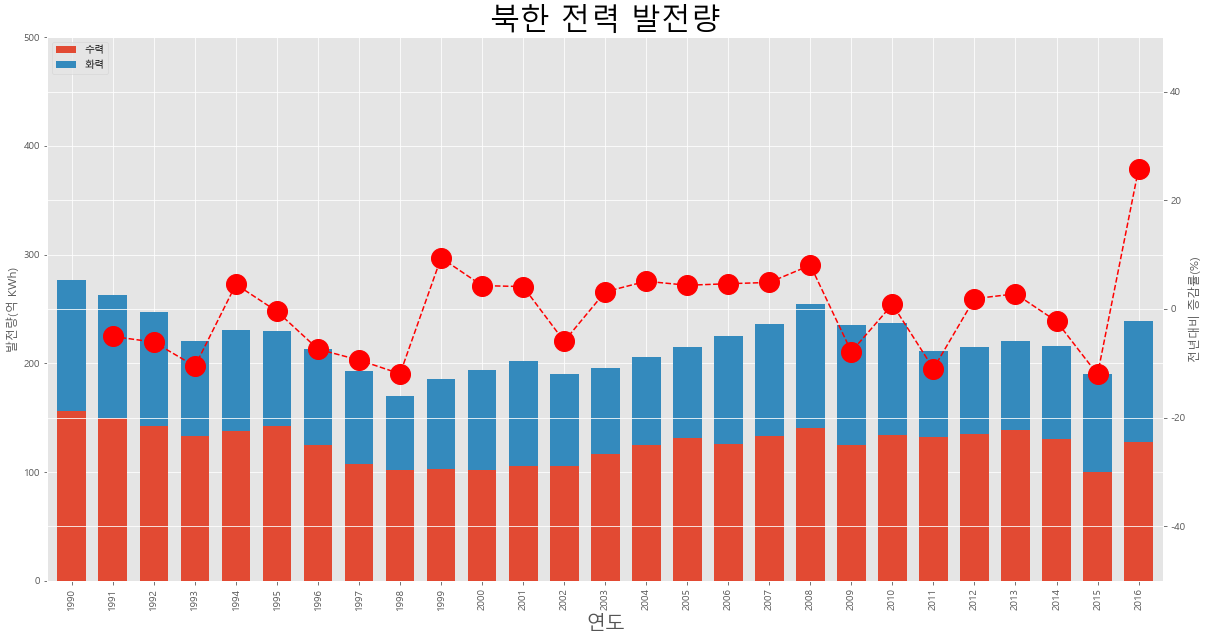

In [29]:
ax1 = df[['수력','화력']].plot(kind='bar', figsize=(20, 10), width=0.7, stacked=True)
ax2 = ax1.twinx()
ax2.plot(df.index, df.증감률, ls='--', marker='o', markersize=20,
        color='red', label='전년대비 증감률(%)')

ax1.set_ylim(0, 500)
ax2.set_ylim(-50, 50)

ax1.set_xlabel('연도', size=20)
ax1.set_ylabel('발전량(억 KWh)')
ax2.set_ylabel('전년대비 증감률(%)')

plt.title('북한 전력 발전량', size=30)
ax1.legend(loc='upper left')

plt.show()